In [1]:
%load_ext autoreload
%autoreload 2

In [23]:
VERBOSE = True
HTML_MODE = True
if not HTML_MODE:
    %matplotlib widget
else:
    %matplotlib inline

In [3]:
### 週販レポート
# 標準ライブラリ
import os
import sys
from pathlib import Path
from datetime import datetime, timedelta

# サードパーティライブラリ
import pandas as pd
from pandas import Timedelta
import matplotlib.pyplot as plt
import japanize_matplotlib
from matplotlib.ticker import ScalarFormatter
from IPython.display import Markdown, display

# プロジェクト内モジュール
from gamedata import hard_sales as hs
from gamedata import plot_hard as ph
from gamedata import hard_info as hi
from gamedata import hard_event as he
from gamedata import chart_hard as ch
from gamedata import util as gu

In [7]:
# レポート日付
from report_config import get_config

config = get_config()
report_date = config["date"]
report_event_mask = he.EventMasks(hard=1.5, price=3, sale=2, soft=1.5, event=1)

def show_title(d:datetime) -> None:
    last_updated_str = d.strftime("%Y-%m-%d")
    mode = "[[LAB MODE]]" if not HTML_MODE else ""
    display(Markdown(f"# 国内ゲームハード週販レポート ({last_updated_str}) {mode}"))

if not HTML_MODE:
    plt.show()

In [9]:
show_title(report_date)

# 国内ゲームハード週販レポート (2026-01-04) 

* ハードウェアの販売データはファミ通の調査結果を基にしています。
* 一部のデータは処理上の都合により、週次値に調整しています。
* [過去の週販レポート](../index.html)

## 直近4週間のハード売り上げ／累計推移

In [10]:
df1 = hs.load_hard_sales()
(out1, style1) = ch.chart_units_by_date_hw(df1, begin=gu.weeks_before(report_date, 3), end=report_date)
display(style1)

Switch2の2025年最終週は20万台でした｡今年5回目の20万台超えです｡
任天堂は12月をSwitch2大量出荷で完遂しました｡
今後は2026年に入ってからの出荷状況に注目です｡

Switchは微減の3.2万台｡世代交代が進んでいます｡

PS5は3週連続で約1万9千台です｡
このブレの無さは何なんでしょうか｡

## 週販推移

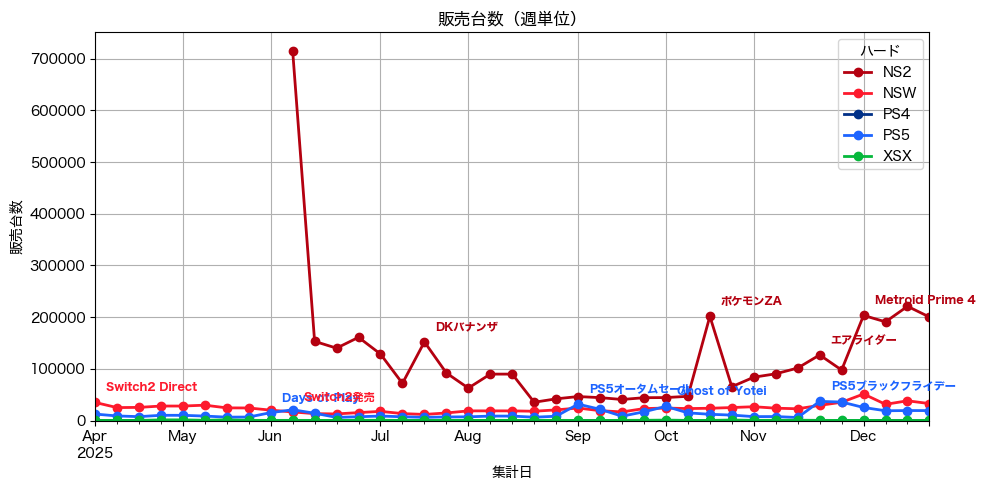

In [16]:
(fig, df) = ph.plot_sales(begin=gu.report_begin(report_date), end=report_date, event_mask=he.EVENT_MASK_MIDDLE)

### 週販推移(拡大）

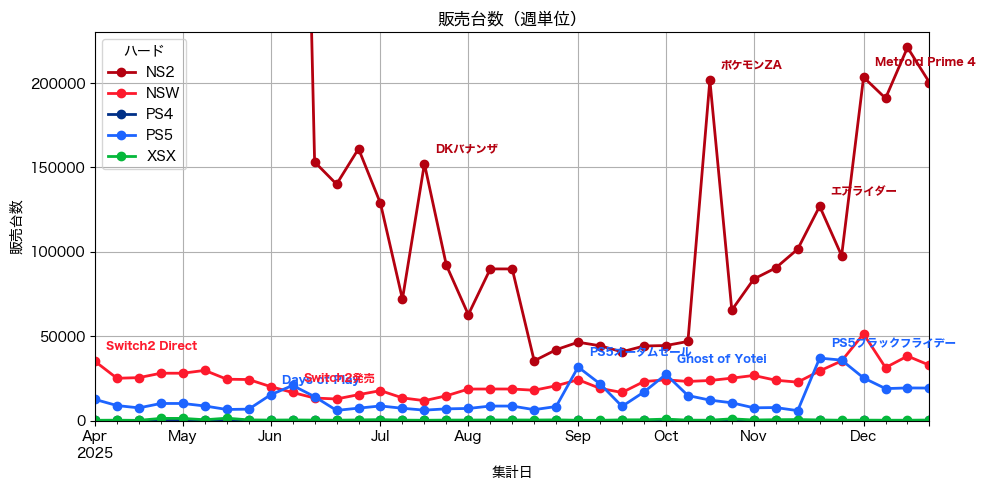

In [35]:
(fig, df) = ph.plot_sales(begin=gu.report_begin(report_date), end=report_date, ymax=230000, event_mask=he.EVENT_MASK_MIDDLE)

Switch2は年末商戦を大量出荷で締めくくりました｡
年始の1週目も同程度と予想しますが､その後は減少するでしょう｡

年始明けでSwitchは本格的に減少するでしょう｡
今までのSwitch週販最低記録は 2025/7/25の11,766台です｡2月あたりには4桁が見えてきそうです｡

PS5は不思議な低水準の安定が続いています｡
これがクリスマスシーズンだけなのか､2026年も続くのか注目です｡

## 月間販売推移

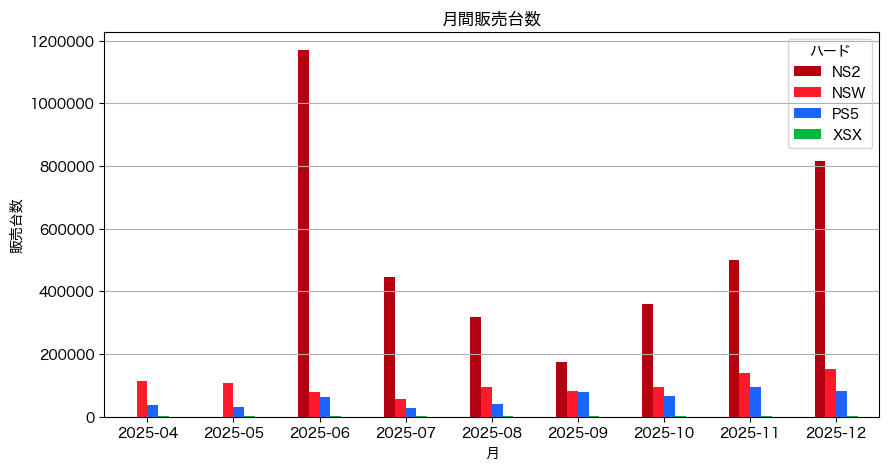

In [14]:
(fig, df) = ph.plot_monthly_bar_by_hard(hw=["NS2", "PS5", "NSW", "XSX"], 
                                        begin=gu.report_begin(report_date), end=report_date,
                                        stacked=False)


In [15]:
month_style = ch.style_sales(df)
display(month_style)

hw,NS2,NSW,PS5,XSX
year_month,,,,
2025-04,0,"113,513","38,983","1,710"
2025-05,0,"106,506","32,001","3,467"
2025-06,"1,169,684","78,097","63,516","1,400"
2025-07,"444,706","57,532","28,959","1,197"
2025-08,"319,690","94,517","39,004","1,599"
2025-09,"175,542","82,946","78,693","1,121"
2025-10,"358,399","96,080","64,732","2,253"
2025-11,"500,414","138,018","93,852","1,891"
2025-12,"815,632","153,619","82,691",895


12月のSwitch2は81万台に到達｡任天堂は2025Q3に167万台を販売しました｡

### Nintendo Switchの月間販売台数： 前々年､前年との比較

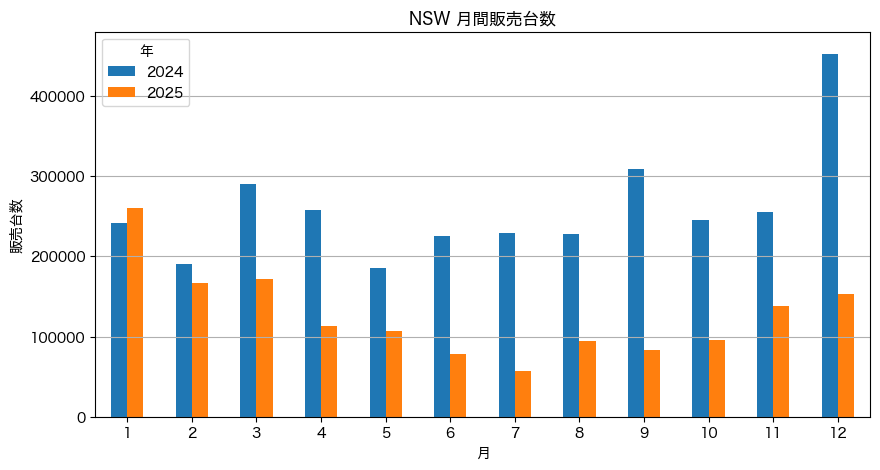

In [34]:
(fig, df) = ph.plot_monthly_bar_by_year(hw="NSW", ymax=480000, begin=gu.years_ago(report_date), end=report_date)

In [17]:
if False:
    this_year = report_date.year
    df = df.drop(columns=[this_year - 2])
    df.loc[:, "YoY"] = df.loc[:,this_year] / df.loc[:, this_year - 1]
    df.style.format({'YoY': '{:.1%}', this_year: '{:,.0f}', this_year - 1: '{:,.0f}'})

12月の前年比は34%(予想33%)になりました｡
SwitchからSwitch2へのシフトは順調で､2026年は前年比50%を切るのが普通になるでしょう｡

### PlayStation 5の月間販売台数： 前々年､前年との比較


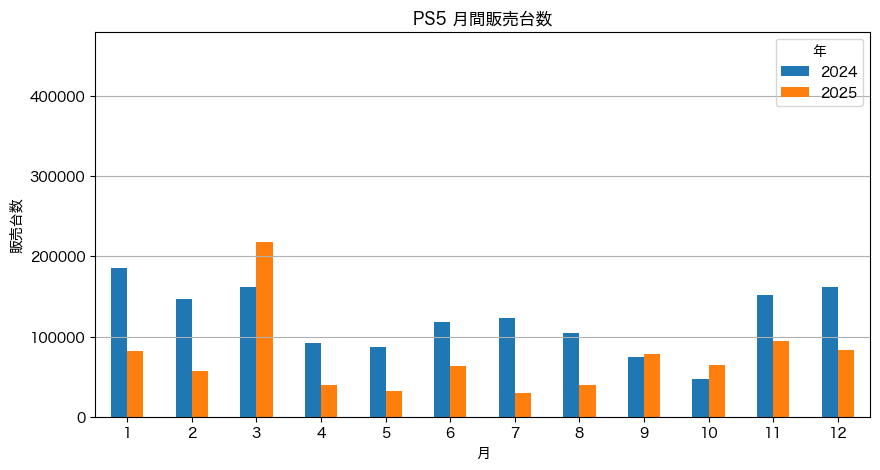

In [31]:
(fig, df) = ph.plot_monthly_bar_by_year(hw="PS5", ymax=480000, 
                                        begin=gu.years_ago(report_date), end=report_date)

In [33]:
if False:
    this_year = report_date.year
    df = df.drop(columns=[this_year - 2])
    df.loc[:, "YoY"] = df.loc[:,this_year] / df.loc[:, this_year - 1]
    ps5_monthly_style = ch.style_sales(df, percent_column="YoY", columns=[this_year, this_year - 1])
    display(ps5_monthly_style)

PS5の2025年12月は予想通り8万2千台にとどまりました｡前年比51%なのでほぼ半減です｡


## 累計販売推移


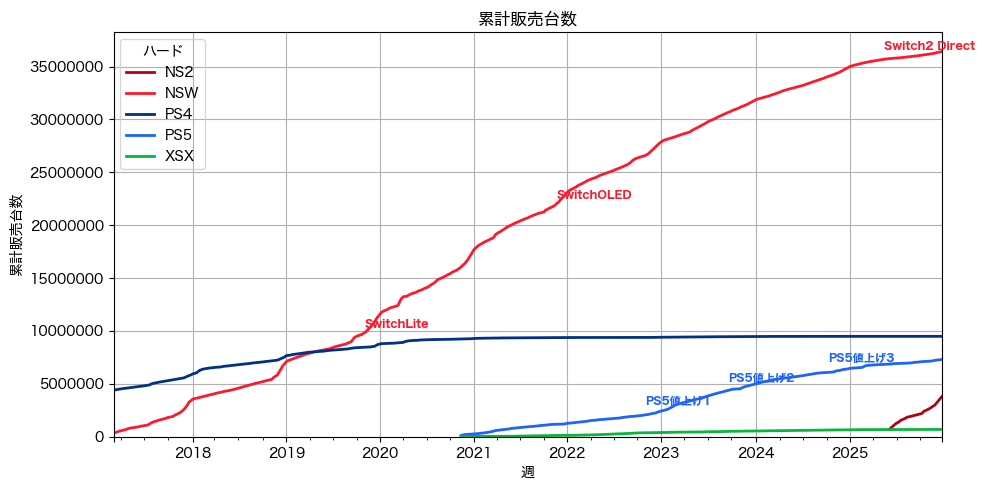

In [28]:
long_range_event_mask = he.EventMasks(hard=0.5, soft=0, event=0, price=0, sale=0)
(cumulative_sales_fig, cumulative_sales_df) = ph.plot_cumulative_sales(hw=['PS4', 'NS2', 'PS5', 'NSW', 'XSX'], begin=datetime(2017,3,1), event_mask = he.EVENT_MASK_LONG)

In [29]:
cs_style = ch.style_sales(cumulative_sales_df.tail(1), datetime_index=True)
display(cs_style) if VERBOSE else None

hw,NS2,NSW,PS4,PS5,XSX
report_date,,,,,
2025-12-28,"3,784,067","36,416,161","9,491,047","7,298,210","689,554"


Switch2の累計400万台は次週にお預けです｡
一方､PS5の累計が730万台に到達しました｡

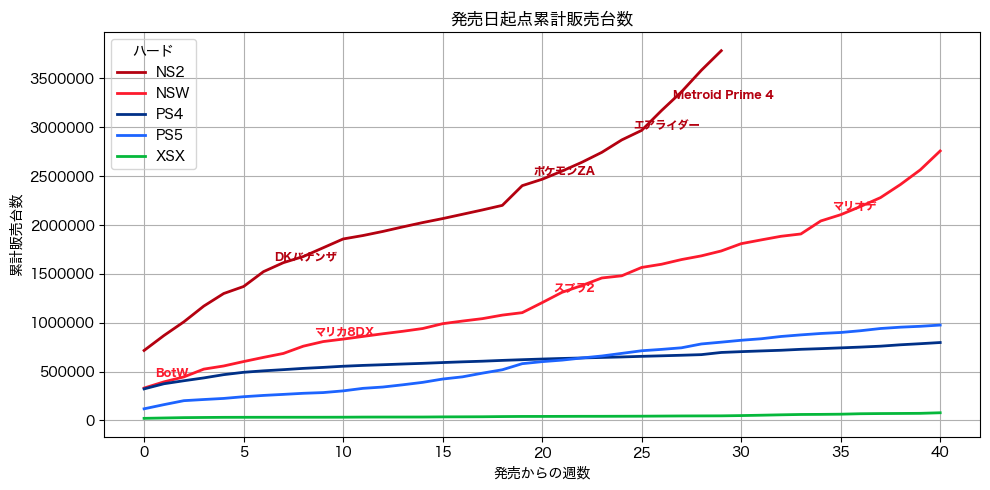

In [26]:
(csd_fig, csd_df) = ph.plot_cumulative_sales_by_delta(hw=['PS4', 'NS2', 'PS5', 'NSW', 'XSX'], end=40, event_mask=he.EVENT_MASK_MIDDLE)

In [27]:
csd_style = ch.style_sales(csd_df.iloc[28:31, :])
display(csd_style) if VERBOSE else None

hw,NS2,NSW,PS4,PS5,XSX
delta_week,,,,,
28,"3,583,810","1,683,937","672,791","782,050","45,503"
29,"3,784,067","1,734,083","695,004","800,380","46,133"
30,nan,"1,808,583","703,288","819,799","48,827"


### Switch2/PS5差分


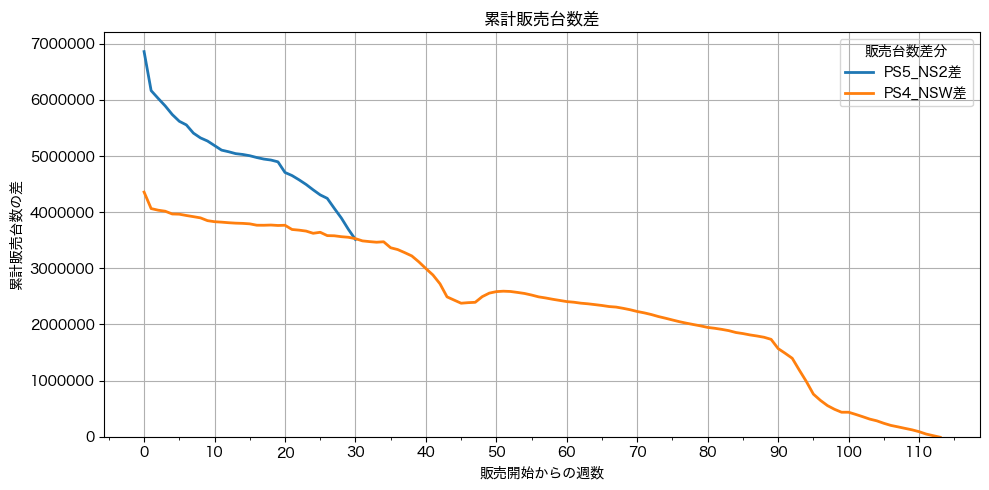

In [21]:
(fig4, d4) = ph.plot_cumsum_diffs(cmplist = [('NS2', 'PS5'), ('NSW', 'PS4')], xgrid=10)


In [24]:
d4.iloc[28:32, :] if VERBOSE else None

hw,PS5_NS2差,PS4_NSW差
28,3896894.0,3564291.0
29,3695168.0,3553765.0
30,3514143.0,3529438.0
31,NaN,3489502.0


現時点でSwitch2の累計378万台､PS5の累計は729万台です｡Switch2とPS5の差は351万台｡
30週間で､PS5に追いつく道筋の半分を超えました｡


### PS5値下げ効果をPS4と比較で可視化

Switch2対抗として語られることもあるPS5DE日本語版の値下げですが､その面での効果は特にありませんでした｡
しかし､PS4との推移比較では重要な効果を発揮していることが分かります｡

以下は､PS4とPS5のそれぞれの発売からの累計台数の推移をプロットしたものです｡横軸は週(Week)です｡

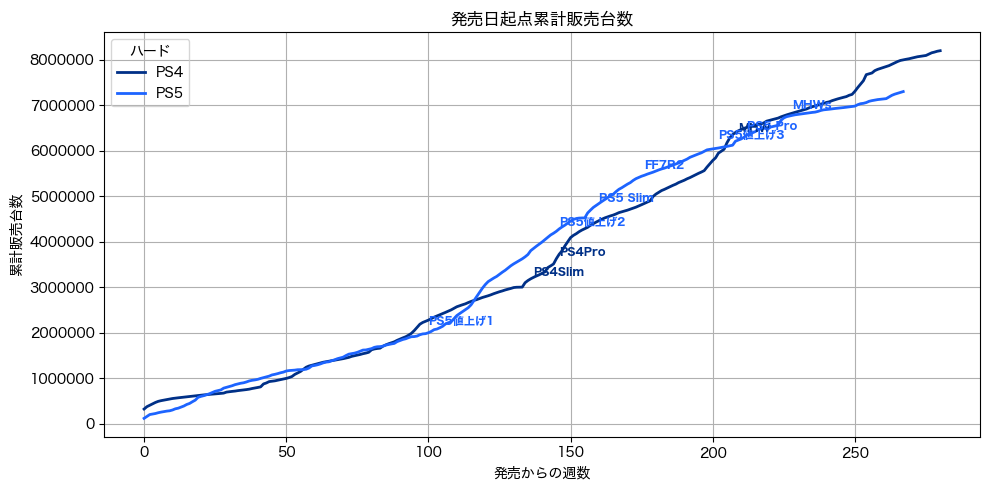

In [25]:
ps45_event_mask = he.EventMasks(hard=1.5, soft=1, event=1, price=1, sale=0)
(fig, df) = ph.plot_cumulative_sales_by_delta(hw=['PS4', 'PS5'], end=280, event_mask=ps45_event_mask)

100週まではPS4,PS5は同等です｡120週目あたりからPS5が加速しPS4を上回ますが､
200週を超えた辺りで逆転します｡MHWs効果で225週目でPS5はPS4に追いつきますが､
その後はPS4が上回り､差はどんどん大きくなります｡

以下は､PS4,PS5の同時期の累計差だけをプロットしたグラフです｡プラスの値ならPS5が(PS4比で)好調､マイナス値ならPS5不調(PS4比で)を示します｡


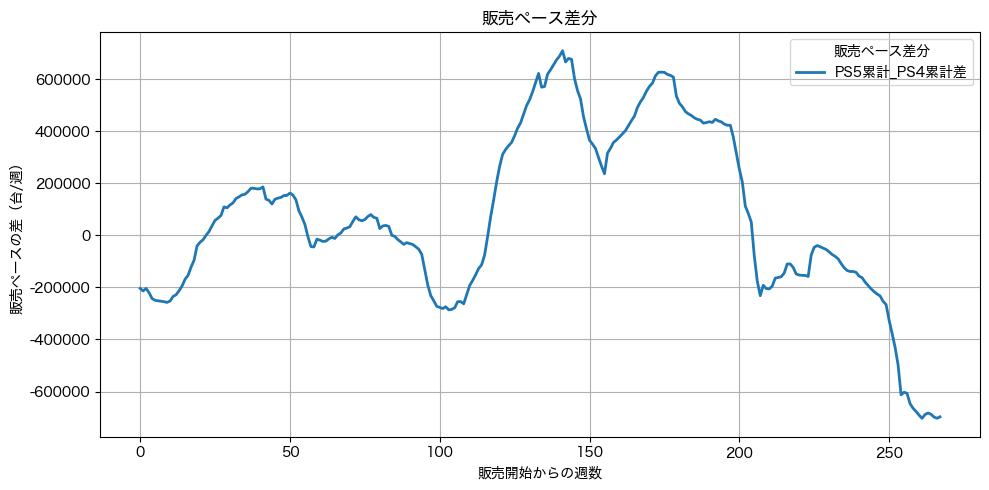

In [26]:
(fig, df_ps4_ps5_diff) = ph.plot_sales_pase_diff('PS4', 'PS5')



225週目､MHWs効果で一旦0に近づきますが､その後は急降下しています｡
これはMHWs以降のPS5がPS4に比べて極めて不調であったことを示します｡
(大作ソフト発売後に絶不調になるのはソニーにとっても予想困難だったでしょう)

この急降下を止めたのが **PS5DE日本語版の値下げ** です｡

PS5とPS4の差は値下げ版発売週直前の2025/11/16に
最低値の-703,092台を記録した後､値下げとブラックフライデー効果により､
それ以上落ち込むのを阻止､2025/12/28集計でも -697,394で､値下げ前の最悪値から若干持ち直しています｡

つまり､PS5DE日本語版の値下げにより､**同時期のPS4と同程度のペースで売れる** ようになったわけです｡

In [27]:
ps4_ps5_10 = df_ps4_ps5_diff.tail(8)
ps4_ps5_10 = ps4_ps5_10.rename(columns={'ps4_report_date': 'PS4集計週', 'ps5_report_date': 'PS5集計週'})
s5 = ch.style_sales(ps4_ps5_10, columns=['PS5累計_PS4累計差'], date_columns=["PS4集計週", "PS5集計週"])
display(s5)

,PS5累計_PS4累計差,PS4集計週,PS5集計週
260,"-690,575",2019-02-17,2025-11-09
261,"-703,092",2019-02-24,2025-11-16
262,"-688,511",2019-03-03,2025-11-23
263,"-682,674",2019-03-10,2025-11-30
264,"-687,382",2019-03-17,2025-12-07
265,"-698,216",2019-03-24,2025-12-14
266,"-702,772",2019-03-31,2025-12-21
267,"-697,394",2019-04-07,2025-12-28


これが一時的な効果なのか､2026年を通じて効果があるのかに注目です｡

## Switch2初動状況

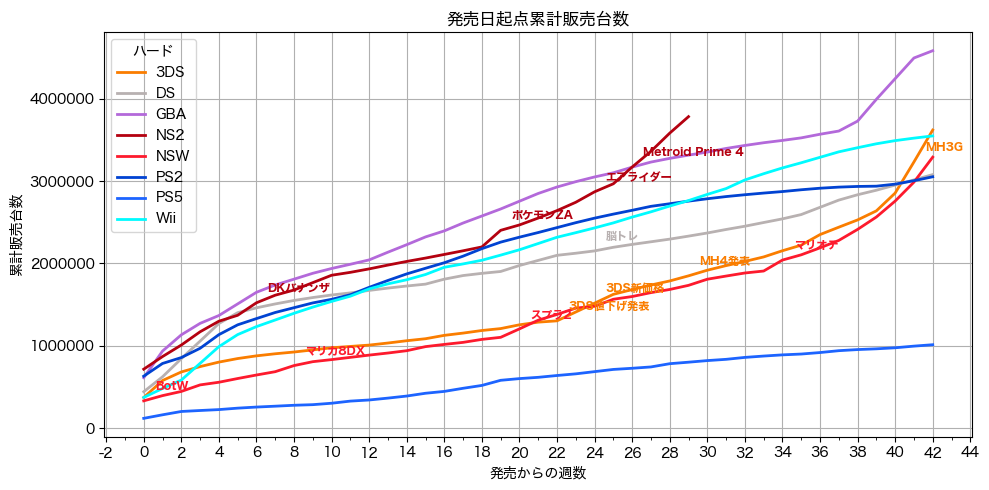

In [28]:
(fig, df) = ph.plot_cumulative_sales_by_delta(hw=["GBA", "NS2", "DS", "PS2", "Wii", "3DS", "NSW", "PS5"], 
                                        mode="week", xgrid=2, end=42,
                                        event_mask=he.EVENT_MASK_MIDDLE)

In [29]:
df12 = df.iloc[df.index == 30]
# df12をunpivotして、列名を"ハード"、"販売数"にする
df12_unpivot = df12.unstack().reset_index()
df12_unpivot.columns = ['ハード', '週数', '販売数']
df12_unpivot.sort_values(by='販売数', ascending=False, inplace=True)
df12_unpivot.set_index('ハード', inplace=True)

styled_df12_unpivot = ch.style_sales(df12_unpivot, columns=['販売数'], bar='販売数')
display(styled_df12_unpivot)

,週数,販売数
ハード,,
GBA,30,"3,353,409"
Wii,30,"2,839,133"
PS2,30,"2,786,320"
DS,30,"2,370,340"
3DS,30,"1,918,100"
NSW,30,"1,808,583"
PS5,30,"819,799"
NS2,30,nan


Switch2は今週も歴代初動1位の座をキープしています｡
早ければ次回集計で400万台に到達する可能性があります｡

同時期のWii, PS2と比べて100万台多く､
3DS, Switchと比べると200万台以上多く普及しています｡
驚異的な普及速度です｡

## 年単位の状況


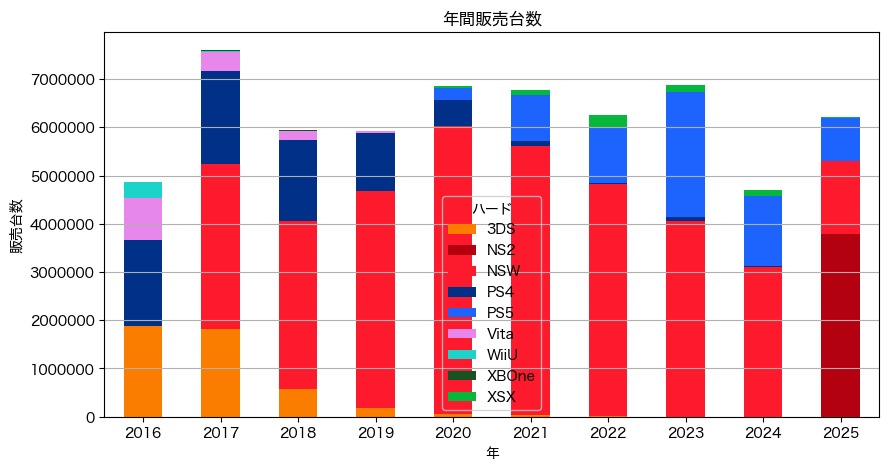

In [30]:
(fig, df) = ph.plot_yearly_bar_by_hard(hw=['PS4', 'PS5', 'NSW', 'NS2', '3DS', 'WiiU', 'Vita', 'XSX', 'XBOne'], 
                                       begin=gu.years_ago(report_date, 10),
                                       end=report_date, stacked=True)

2025年の販売台数は621万台でした｡
2022年の626万台にはギリ届来ませんでしたが､2018,2019年を超える事ができました｡


In [31]:
df["合計"] = df.sum(axis=1)
yearly_style = ch.style_sales(df)
display(yearly_style)

hw,3DS,NS2,NSW,PS4,PS5,Vita,WiiU,XBOne,XSX,合計
year,,,,,,,,,,
2016,"1,874,457",0,0,"1,790,883",0,"865,002","336,151","8,897",0,"4,875,390"
2017,"1,827,131",0,"3,407,158","1,935,247",0,"396,207","21,817","14,664",0,"7,602,224"
2018,"566,420",0,"3,482,388","1,695,227",0,"181,728",0,"15,339",0,"5,941,102"
2019,"191,173",0,"4,493,903","1,196,153",0,"37,668",0,"8,315",0,"5,927,212"
2020,"62,761",0,"5,956,943","542,647","255,150",0,0,"3,585","31,424","6,852,510"
2021,"28,540",0,"5,579,127","104,054","968,185",0,0,0,"97,234","6,777,140"
2022,"10,664",0,"4,804,546","22,823","1,154,054",0,0,0,"269,737","6,261,824"
2023,"3,033",0,"4,062,609","73,292","2,587,468",0,0,0,"141,712","6,868,114"
2024,162,0,"3,109,103","13,728","1,454,149",0,0,0,"118,221","4,695,363"


### 年単位のメーカーシェア

maker_name,Nintendo,SONY,Microsoft
year,,,
2017,69.1%,30.7%,0.2%
2018,68.1%,31.6%,0.3%
2019,79.0%,20.8%,0.1%
2020,87.8%,11.6%,0.5%
2021,82.7%,15.8%,1.4%
2022,76.9%,18.8%,4.3%
2023,59.2%,38.7%,2.1%
2024,66.2%,31.3%,2.5%
2025,85.3%,14.2%,0.5%


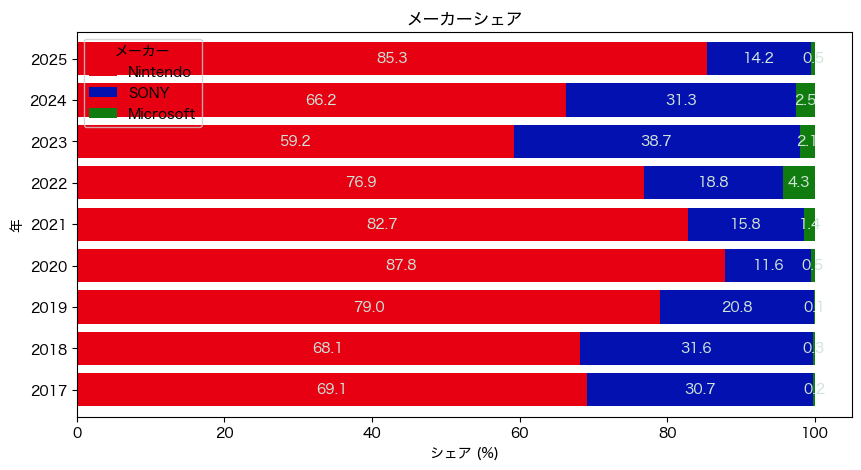

In [36]:
(fig, df) = ph.plot_maker_share_bar(begin=datetime(2017, 1, 1))

if VERBOSE:
    share_style = df.style.format("{:.1f}%")  # シェア率をパーセント表示する場合
    share_style = share_style.background_gradient(cmap='Blues', axis=0)
    display(share_style)

任天堂のシェアがさらに上昇し､85.3%で2025年は完了しました｡

In [30]:
if False:
    (fig, df) = ph.plot_maker_share_pie(begin_year=2025, end_year=2025)